* **Heart failure**
* 
Heart failure does not mean the heart has stopped working. Rather, it means that the heart works less efficiently than normal. Due to various possible causes, blood moves through the heart and body at a slower rate, and pressure in the heart increases. As a result, the heart cannot pump enough oxygen and nutrients to meet the body's needs. The chambers of the heart may respond by stretching to hold more blood to pump through the body or by becoming stiff and thickened. This helps to keep the blood moving, but the heart muscle walls may eventually weaken and become unable to pump as efficiently
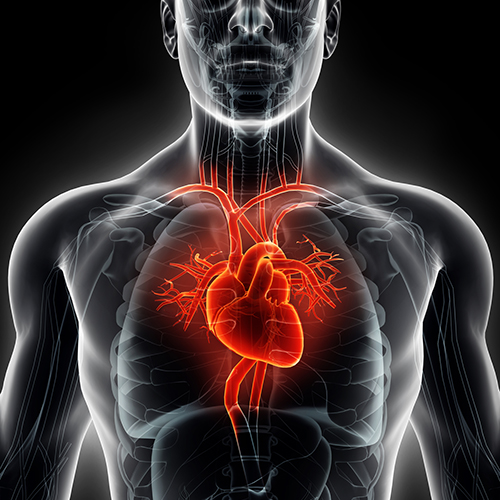

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

Exploratory analysis

Finding probablity of death on basis of age

In [ ]:
df2 = df[["age", "DEATH_EVENT"]].groupby(['age'], as_index=False).mean().sort_values(by='age', ascending=False)
sns.regplot(data=df2,x='age',y='DEATH_EVENT')
df2

In [ ]:
sns.distplot(df['age'], hist=True, kde=True,bins=int(180/5), color = 'gold')

The normal number of platelets in the blood is 150,000 to 400,000

In [ ]:
sns.distplot(df['platelets'], hist=True, kde=True,bins=int(180/5), color = 'darkblue')

A normal blood sodium level is between **135 and 145(mEq/L)**. Hyponatremia occurs when the sodium in your blood falls below 135

In [ ]:
sns.distplot(df['serum_sodium'], hist=True, kde=True,bins=int(180/5), color = 'darkblue')

Almost 50% of the people having sodium serum level below 135 have died

In [ ]:
df_s = df[df['serum_sodium'] < 135]
df_s['DEATH_EVENT'].value_counts()
sns.countplot(x="serum_sodium", hue="DEATH_EVENT", data=df_s)

An LV ejection fraction of 55 percent or higher is considered normal. An LV ejection fraction of 50 percent or lower is considered reduced

In [ ]:
sns.distplot(df['ejection_fraction'], hist=True, kde=True,bins=int(180/5), color = 'brown')

0.7 to 1.2(mg/dL)) for men and 0.5 to 1.0 mg/dL for women.

In [ ]:
sns.distplot(df['serum_creatinine'], hist=True, kde=True,bins=int(180/5), color = 'green')

Applying confidence interval to remove the outliers

In [ ]:
from scipy.stats import zscore
import math
from scipy import stats
import numpy as np
import scipy.stats
import pandas as pd
z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]
new_df

Finding out the co-relation in the data

In [ ]:
corrmat = new_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Create new dataframe with paramerters having high co-relation with death

In [ ]:
updated_df = df[['age','serum_creatinine','ejection_fraction','serum_sodium','time','DEATH_EVENT']]

ML: Random Forest

In [ ]:
y = updated_df["DEATH_EVENT"]
x = updated_df.drop(labels = ["DEATH_EVENT"],axis = 1)

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  cross_val_score,GridSearchCV

model = RandomForestClassifier(random_state=15)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc*100


Other parameters:
Weight
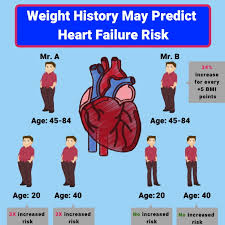
read this article for more info: https://medicalxpress.com/news/2018-12-weight-history-heart-failure.html